## A Mie picture
No data here, just a nice picture of Mie resonances for a single index and radii from 6-10µm

In [9]:
#Simplified import block...
import math
import numpy as np
import matplotlib.pyplot as plt
import mie_data_generator_function as mdg

In [10]:
# Set up data range
bead_index = 1.5875 #fix it at polystyrene
n_radii = 500
n_angles = 500
radius = np.linspace(6e-6, 10e-6, n_radii)  #same as the present model for now
scatI = np.zeros([n_radii,n_angles], dtype = 'float')
theta = np.zeros([n_angles], dtype='float')

78 59.57508192648154
78 59.65467455430583
78 59.734267182130125
78 59.813859809954415
78 59.89345243777871
78 59.973045065602996
78 60.052637693427286
78 60.13223032125157
78 60.21182294907586
78 60.29141557690016
79 60.37100820472445
79 60.45060083254873
79 60.53019346037303
79 60.60978608819732
79 60.68937871602161
79 60.768971343845905
79 60.848563971670195
79 60.92815659949448
79 61.00774922731876
79 61.08734185514306
79 61.16693448296735
80 61.24652711079165
80 61.32611973861594
80 61.40571236644022
80 61.48530499426451
80 61.56489762208881
80 61.6444902499131
80 61.724082877737395
80 61.80367550556168
80 61.88326813338597
80 61.962860761210266
80 62.04245338903454
80 62.12204601685884
81 62.20163864468313
81 62.281231272507426
81 62.36082390033171
81 62.440416528156
81 62.5200091559803
81 62.59960178380459
81 62.67919441162888
81 62.75878703945316
81 62.83837966727746
81 62.91797229510174
81 62.99756492292603
81 63.07715755075033
82 63.15675017857462
82 63.236342806398916
82 63.3

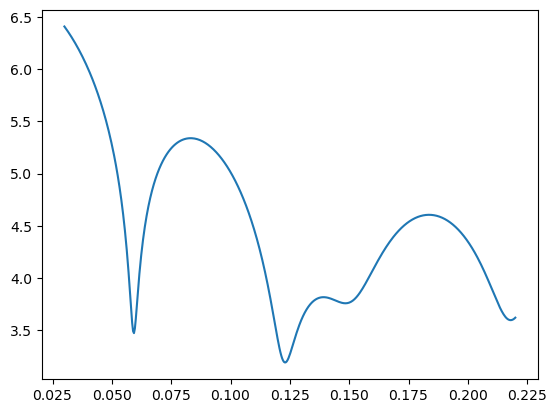

In [11]:
#make a Mie data array
for ii in range(radius.shape[0]):
    theta, scatI[ii,:] = mdg.generate_data(bead_index, radius[ii], n_angles)

#plot one for kicks
fig, ax = plt.subplots()
ax.plot(theta, np.log10(scatI[1,:]))
plt.show()

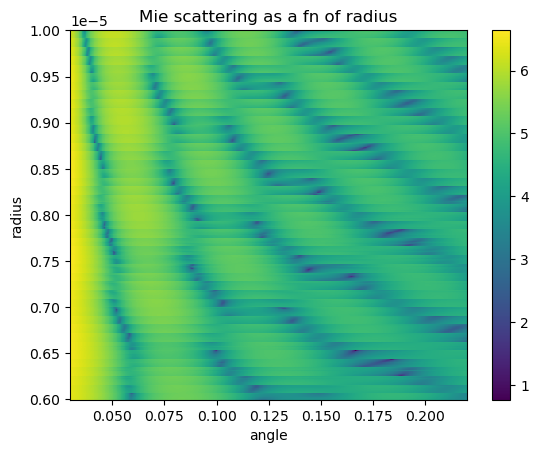

In [14]:
#now let's make a nice color plot of this
plt.figure()
plt.pcolor(theta, radius, np.log10(scatI))
plt.xlabel('angle')
plt.ylabel('radius')
plt.title('Mie scattering as a fn of radius')
plt.colorbar()
plt.show()

I'm a bit worried about teh apparent sharp jumps in teh radius plot. Let's have a loo at a radial slice of this at one angle...

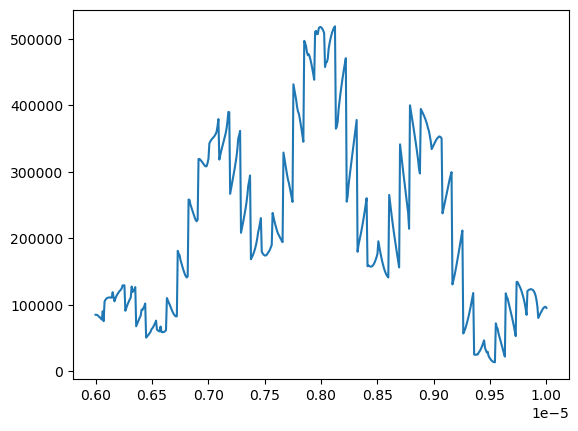

In [17]:
fig, ax = plt.subplots()
ax.plot(radius, scatI[:,100])
plt.show()

OK, that's what I thought. That looks problematic, becasue I'm sure uit should be a smooth function, and it really isn't. So, where does that come from? A problem in the Mie generation routine, maybe?? Wonder if the Matlab version looks the same? 

(16th Jan - note added. Can look at all of this in the Onenote notebook, link here:https://sotonac.sharepoint.com/teams/Phaseretrievalwithneuralnets/_layouts/OneNote.aspx?id=%2Fteams%2FPhaseretrievalwithneuralnets%2FShared%20Documents%2Fnanoparticle%20Mie%20scattering%20project%2Fnano%20Mie%20scattering%20project&wd=target%28NN%20models.one%7C9DEBDA63-8233-48F7-9E9A-7EF1E07855D7%2FProblem%20with%20the%20calculation%E2%80%A6%7C27F94FFF-4EDB-6944-8F25-2F49A30352ED%2F%29
onenote:https://sotonac.sharepoint.com/teams/Phaseretrievalwithneuralnets/Shared%20Documents/nanoparticle%20Mie%20scattering%20project/nano%20Mie%20scattering%20project/NN%20models.one#Problem%20with%20the%20calculation…&section-id={9DEBDA63-8233-48F7-9E9A-7EF1E07855D7}&page-id={27F94FFF-4EDB-6944-8F25-2F49A30352ED}&end)

Long link! Anyway, the number of terms tha you use to calculate D is the important thing. You need 50% more terms than the number of a,b terms. So at present all the simulated data were wrong, because the D values hadn't been calculated propaerly. So I'm just about to alter the mie_data_generator python function to make it work, hopefully. 
